# Classification
install scikit learn: pip install scikit-learn

install pandas: pip install pandas




In [ ]:
from scipy.ndimage import label
from sklearn.module import Model # module/Model are just place holders here for the actual name of the model
model = Model()
model.fit(X, y) # X is array of our features, y is array of out target  variable
prediction = model.predict(X_new)

In [2]:
import pandas as pd
dataset = "datasets/telecom_churn_clean.csv"
churn_df = pd.read_csv(dataset)
churn_df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [12]:
# k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
dataset = "datasets/telecom_churn_clean.csv"
churn_df = pd.read_csv(dataset)
X = churn_df[["total_day_charge", "total_eve_charge"]].values # return DataFrame (two-dimensional)
y = churn_df["churn"].values # return series # return Series (one-dimensional)
print(f"X shape: {X.shape}, y shape: {y.shape}")

knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X, y)

X_new = np.array([[56.8, 17.5],
                  [24.4, 24.1],
                  [50.1, 10.9]])

predictions = knn.predict(X_new)
print(f"Predictions {predictions}")

X shape: (3333, 2), y shape: (3333,)
Predictions [1 0 0]


# measuring model performance
## Accuracy = correct predictions / total observations
The data should be split into training set and test set
The training set is used to fit/train
The training set is used to calculate the model accuracy


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

dataset = "datasets/telecom_churn_clean.csv"
churn_df = pd.read_csv(dataset)

X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values

# test_size=0.3 >> means 30% of the data is used for testing, 70% of the data is used for training
# random_state=21 >> any random number we can put here.  this ensures the dataset split the same way every time we run the code so the results are reproducible
# stratify=y >> this keeps the proportion of the classes (churned vs not churned) remain the same in both training and test sets, to prevent imbalanced split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(f"Accuracy: {knn.score(X_test, y_test)}")


Accuracy: 0.872


# Model complexity and over/underfitting

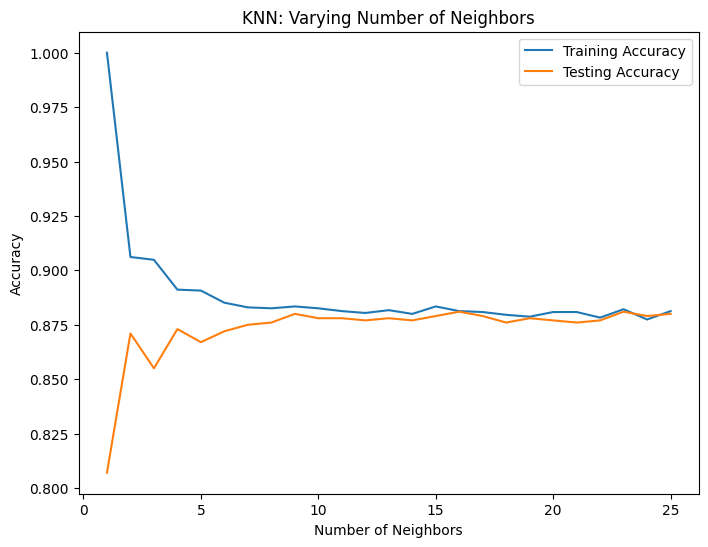

In [14]:
# checking the accuracy of the model using different knn neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

dataset = "datasets/telecom_churn_clean.csv"
churn_df = pd.read_csv(dataset)

X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

train_accuracy = {}
test_accuracy = {}
neighbours = np.arange(1, 26)

# training the model using different neighbors
for neighbour in neighbours:
    knn = KNeighborsClassifier(n_neighbors=neighbour)
    knn.fit(X_train, y_train)
    train_accuracy[neighbour] = knn.score(X_train, y_train)
    test_accuracy[neighbour] = knn.score(X_test, y_test)

# plotting the results to see the difference between them
plt.figure(figsize=(8, 6)) # width and height of the figure in inches
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbours, train_accuracy.values(), label="Training Accuracy") # x-axis is the neighbors, y-axis is the  train_accuracy.values()
plt.plot(neighbours, test_accuracy.values(), label="Testing Accuracy") # x-axis is the neighbors, y-axis is the test_accuracy.values()
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

Chart explanation: The training accuracy starts high because it memorizes the training data, the test accuracy starts low and then increase because of the low K making it too sensitive to noise, but then as it starts having more neighbors, it will lead to better generalization.

# Regression

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset_diabetes = "datasets/diabetes_clean.csv"
df_diabetes = pd.read_csv(dataset_diabetes)
df_diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Type of X and y: <class 'numpy.ndarray'>, <class 'numpy.ndarray'>
Shape of X and y: (768, 8), (768,)
BMI shape: (768,)
BMI reshaped into two-dimensional array: (768, 1)


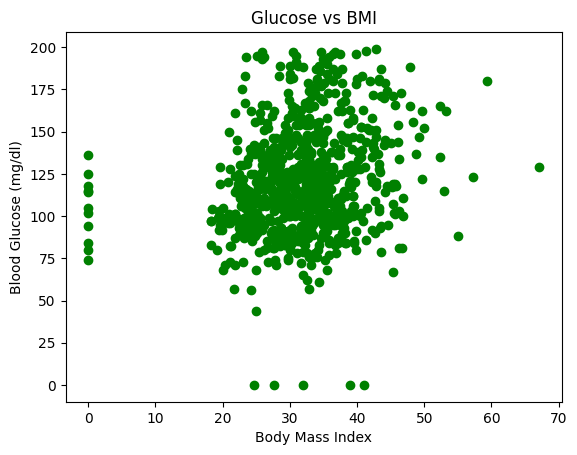

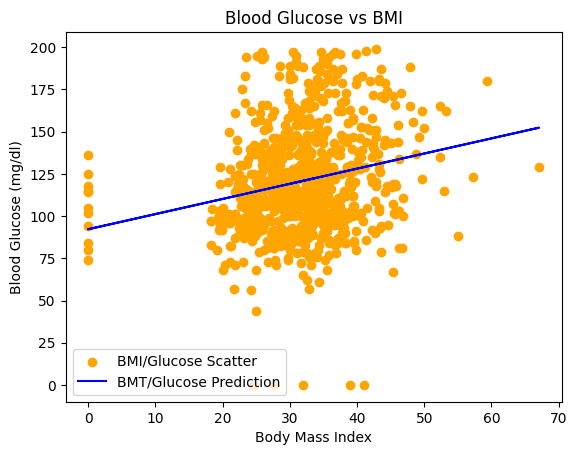

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset_diabetes = "datasets/diabetes_clean.csv"
df_diabetes = pd.read_csv(dataset_diabetes)

X = df_diabetes.drop("glucose", axis=1).values # all the columns except glucose
y = df_diabetes["glucose"].values # glucose column

print(f"Type of X and y: {type(X)}, {type(y)}")
print(f"Shape of X and y: {X.shape}, {y.shape}")

# extracting the bmi table to predict the blood glucose from the bmi feature
X_bmi = df_diabetes["bmi"].values
print(f"BMI shape: {X_bmi.shape}") # (768,) one dimensional array

# because X_bmi will be a feature, we need to format it as two-dimensional array
X_bmi = X_bmi.reshape(-1, 1) # reshape(number_of_rows, number_of_columns) ... (-1) means all the rows, and (1) means just one column
print(f"BMI reshaped into two-dimensional array: {X_bmi.shape}")

# plotting the glucose (y) vs body mass index (X_bmi) using scatter
plt.scatter(X_bmi, y, c="green")
plt.title("Glucose vs BMI")
plt.xlabel("Body Mass Index")
plt.ylabel("Blood Glucose (mg/dl)")
plt.show()

# Fitting a regression model using the glucose and BMT
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # instantiating the model
reg.fit(X_bmi, y)

# generate the predictions
predictions = reg.predict(X_bmi)

# plot the result of the X_bmi and the prediction using scatter and plot
plt.clf() # clearing the plot first (from the previous plot)
plt.scatter(X_bmi, y, label="BMI/Glucose Scatter", c="orange")
plt.plot(X_bmi, predictions, label="BMT/Glucose Prediction", c="blue")
plt.legend()
plt.xlabel("Body Mass Index")
plt.ylabel("Blood Glucose (mg/dl)")
plt.title("Blood Glucose vs BMI")
plt.show()

## Regression Mechanics
y = ax + b
- y: target
- x: single feature
- a,b: parameters/coefficients of the model (slope, intercept)

In [50]:
# Training the model using all the features
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error

# reading the dataset
dataset_diabetes = "datasets/diabetes_clean.csv"
df_diabetes = pd.read_csv(dataset_diabetes)

# extracting the X and y from the dataset
X = df_diabetes.drop("glucose", axis=1).values # all the columns as features except glucose
y = df_diabetes["glucose"].values # only the glucose column as target

# splitting the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# instantiate the model and fit it into the training data
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

# generate the prediction from the test data
y_pred = reg_all.predict(X_test)

# calculate the R-squared
r_squared = reg_all.score(X_test, y_test)
print("r_squared", r_squared)

# calculating the RMSE
rmse = mean_squared_error(y_test, y_pred)
print("RMSE: ", rmse)

r_squared 0.28280468810375115
RMSE:  693.872492922376


# Cross Validation


In [56]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# reading the dataset
dataset_diabetes = "datasets/diabetes_clean.csv"
df_diabetes = pd.read_csv(dataset_diabetes)

# extracting the X and y from the dataset
X = df_diabetes.drop("glucose", axis=1).values # all the columns as features except glucose
y = df_diabetes["glucose"].values # only the glucose column as target

# initiating KFold (with 6 folds) and LinearRegression
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()

# passing the model, X, y and KFold to cross_val_score
cv_result = cross_val_score(reg, X, y, cv=kf)

print("Cross Validation Score: ", cv_result)
print(f"Mean score: {np.mean(cv_result)}, Standard deviation score: {np.std(cv_result)}")
print(f"95% confidence interval: {np.quantile(cv_result, [0.025, 0.975])}")

Cross Validation Score:  [0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]
Mean score: 0.3190969786734479, Standard deviation score: 0.0701532061011419
95% confidence interval: [0.24088592 0.41580685]


# Regularized Regression
- to reduce overfitting
## Ridge regression


In [57]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import pandas as pd


# reading the dataset
dataset_diabetes = "datasets/diabetes_clean.csv"
df_diabetes = pd.read_csv(dataset_diabetes)

# extracting the X and y from the dataset
X = df_diabetes.drop("glucose", axis=1).values # all the columns as features except glucose
y = df_diabetes["glucose"].values # only the glucose column as target

# splitting the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scores list where we gonna save our scores from Ridge
scores = []

# looping through different alphas, train the model and save the result in scores
for alpha in [0.1, 1.0, 10.0, 200.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)

[0.28284666232222233, 0.28320633574804766, 0.2853000732200003, 0.2409524563564498, 0.19292424694100963]


## Losso regression

In [58]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import pandas as pd


# reading the dataset
dataset_diabetes = "datasets/diabetes_clean.csv"
df_diabetes = pd.read_csv(dataset_diabetes)

# extracting the X and y from the dataset
X = df_diabetes.drop("glucose", axis=1).values # all the columns as features except glucose
y = df_diabetes["glucose"].values # only the glucose column as target

# splitting the dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scores list where we gonna save our scores from Lasso
scores = []

# looping through different alphas, train the model and save the result in scores
for alpha in [0.1, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)
## Losso regression

[0.28575325694826237, 0.29795609755827845, 0.17989838789273893, 0.18127361610181125, 0.15679544303617987]


## Lasso for feature selection

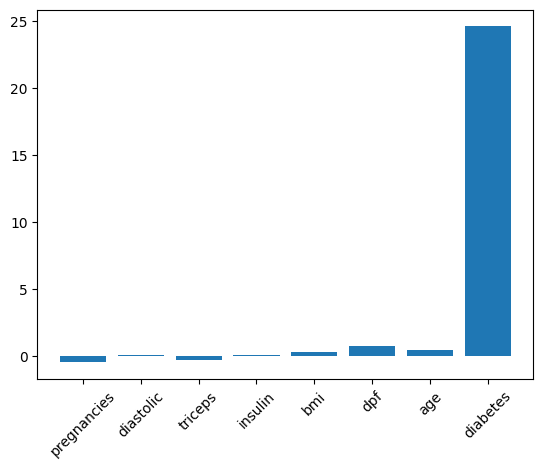

In [59]:
from sklearn.linear_model import Lasso
import pandas as pd
import matplotlib.pyplot as plt

# reading the dataset
dataset_diabetes = "datasets/diabetes_clean.csv"
df_diabetes = pd.read_csv(dataset_diabetes)

# extracting the X and y from the dataset
X = df_diabetes.drop("glucose", axis=1).values # all the columns as features except glucose
y = df_diabetes["glucose"].values # only the glucose column as target

# extract the names of the columns
names = df_diabetes.drop("glucose", axis=1).columns

# initialize Lasso
lasso = Lasso(alpha=0.1)

# fit the model to the data and extract the coef
lasso_coef = lasso.fit(X, y).coef_

# plot the result
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

chart explanation above: it seems the diabetes column is the most important feature in this case